In [3]:
import sciann as sn;
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt
from sciann.utils.math import diff, sign, sin

---------------------- SCIANN 0.6.8.6 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.9.3 
Python Version: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)] 



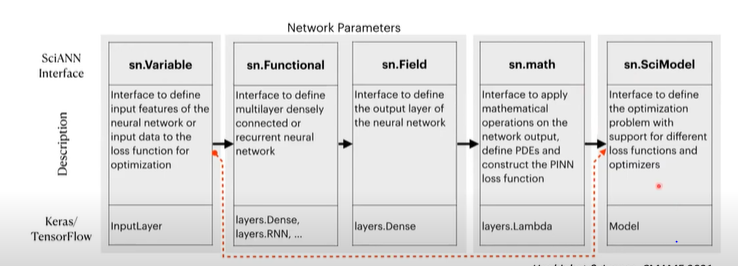

## Linear Data 

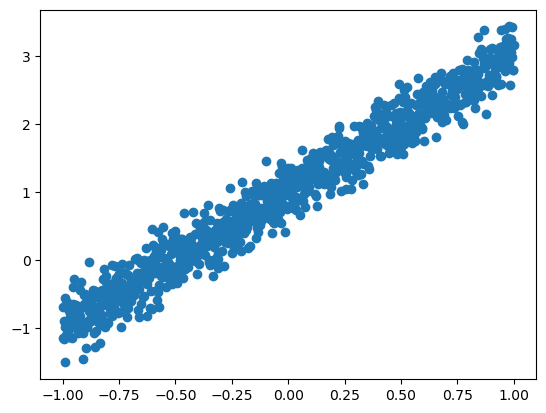

In [15]:
x_data= np.linspace(-1,1,1000)
y_data= 2*x_data+1
y_data+=0.2*np.std(y_data)*np.random.randn(1000)

plt.scatter(x_data, y_data)
plt.show()

In [16]:
x=sn.Variable('x')
y=sn.Functional('y', x) #No hidden layer, since linear trend

In [17]:
m=sn.SciModel(x,y)

In [18]:
m.train(x_data, y_data, learning_rate=0.001, epochs=100, verbose=0)


Total samples: 1000 
Batch size: 64 
Total batches: 16 



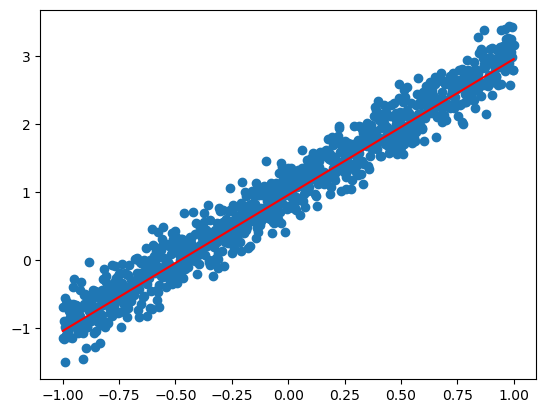

In [20]:
plt.scatter(x_data, y_data)
plt.plot(x_data, y.eval(x_data), 'r')
plt.show()

In [19]:
y.get_weights()

[[array([[1.994532]], dtype=float32), array([0.955372], dtype=float32)]]

## Quadratic Data

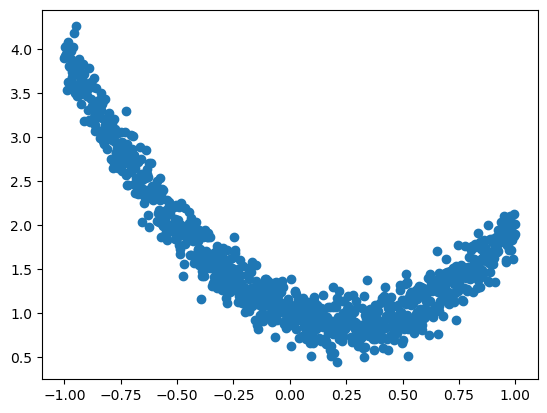

In [9]:
x_data= np.linspace(-1,1,1000)
y_data= 2*x_data**2-x_data+1
y_data+=0.2*np.std(y_data)*np.random.randn(1000)
plt.scatter(x_data, y_data)

In [31]:
x=sn.Variable('x')
y=sn.Functional('y', [x, x**2])

In [32]:
y.get_weights()

[[array([[ 1.6007189 ],
         [-0.15763406]], dtype=float32),
  array([0.00917453], dtype=float32)]]

In [33]:
m=sn.SciModel(x,y, loss_func='mae', optimizer='Adam')

In [34]:
m.train(x_data, y_data, learning_rate=0.001, epochs=100, verbose=0)


Total samples: 1000 
Batch size: 64 
Total batches: 16 



In [35]:
y.get_weights()

[[array([[1.9935474 ],
         [0.26150784]], dtype=float32),
  array([0.9055736], dtype=float32)]]

## Physics Informed Regression

In [101]:
x_data, y_data = np.meshgrid(
    np.linspace(-np.pi, np.pi, 50),
    np.linspace(-np.pi, np.pi, 50)
)
f_data = np.sin(x_data)*np.sin(y_data)

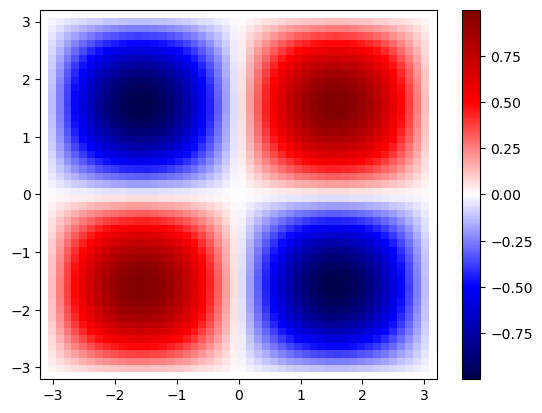

In [102]:
plt.pcolor(x_data, y_data, f_data, cmap='seismic')
plt.colorbar()

In [67]:
x= sn.Variable('x')
y= sn.Variable('y')
f= sn.Functional('f', [x,y], [10, 10, 10, 10], 'sigmoid') #or 4*[10]

In [68]:
f.get_weights()

[[array([[-0.03414376,  1.1799874 ,  0.14809714,  0.11405694,  0.44592434,
           0.38163215, -0.09352684, -0.58136517, -0.3090057 ,  1.1852639 ],
         [-0.2576334 , -0.55245364, -1.0255498 ,  0.43390286, -0.36002147,
          -1.3362626 , -0.12956941,  0.4625501 , -1.184784  ,  0.7045407 ]],
        dtype=float32),
  array([ 0.01530644, -0.01843678, -0.00691187, -0.01196488,  0.03409106,
          0.04320076, -0.04753922, -0.01580417, -0.02714618,  0.01705749],
        dtype=float32)],
 [],
 [array([[ 0.08035996,  0.57967573,  0.16362649, -0.2923289 ,  0.47852388,
          -0.00451911,  0.08888782,  0.34548166,  0.21447381, -0.03926642],
         [-0.12908745,  0.0042273 , -0.1450469 ,  0.45044667, -0.24448614,
          -0.18550672,  0.40578443,  0.38229713, -0.367818  , -0.04207167],
         [-0.48258507,  0.07329816,  0.18658422,  0.17813782,  0.36673597,
          -0.3665141 , -0.1723372 , -0.11548807, -0.07404548, -0.21512055],
         [ 0.56225353, -0.36029655, -0.00

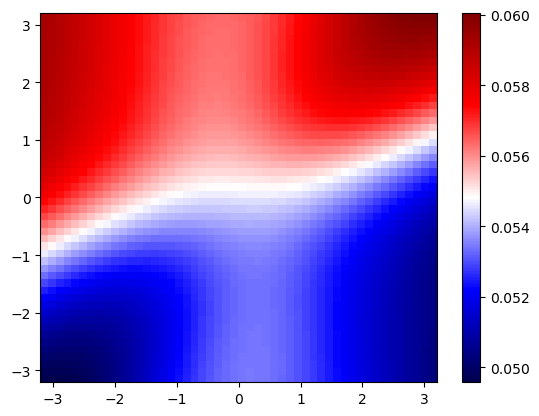

In [69]:
f_pred= f.eval([x_data, y_data])
im = plt.pcolor(x_data, y_data, f_pred, cmap ='seismic')
plt.colorbar(im)

In [70]:
m= sn.SciModel([x,y], f, loss_func='mse', optimizer='adam')

In [71]:
m.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 x (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 y (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 concat_11 (Concatenate)        (None, 2)            0           ['x[0][0]',                      
                                                                  'y[0][0]']                      
                                                                                                  
 D10b_21 (Dense)                (None, 10)           30          ['concat_11[0][0]']          

In [72]:
h=m.train([x_data, y_data], f_data, epochs=250, learning_rate=0.005, verbose=0 )


Total samples: 2500 
Batch size: 64 
Total batches: 40 



In [76]:
f_data

array([[ 1.49975978e-32,  1.56604357e-17,  3.10637274e-17, ...,
        -3.10637274e-17, -1.56604357e-17, -1.49975978e-32],
       [ 1.56604357e-17,  1.63525685e-02,  3.24366282e-02, ...,
        -3.24366282e-02, -1.63525685e-02, -1.56604357e-17],
       [ 3.10637274e-17,  3.24366282e-02,  6.43406479e-02, ...,
        -6.43406479e-02, -3.24366282e-02, -3.10637274e-17],
       ...,
       [-3.10637274e-17, -3.24366282e-02, -6.43406479e-02, ...,
         6.43406479e-02,  3.24366282e-02,  3.10637274e-17],
       [-1.56604357e-17, -1.63525685e-02, -3.24366282e-02, ...,
         3.24366282e-02,  1.63525685e-02,  1.56604357e-17],
       [-1.49975978e-32, -1.56604357e-17, -3.10637274e-17, ...,
         3.10637274e-17,  1.56604357e-17,  1.49975978e-32]])

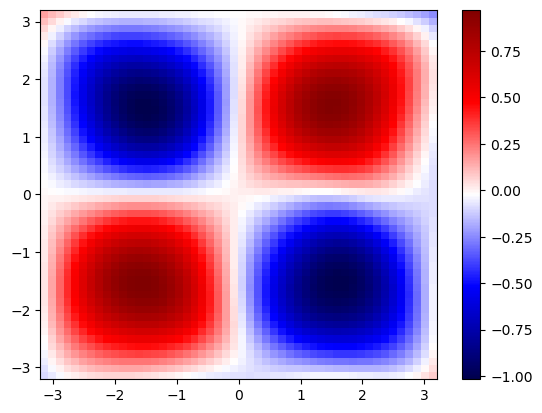

In [73]:
f_pred= f.eval([x_data, y_data])
im = plt.pcolor(x_data, y_data, f_pred, cmap ='seismic')
plt.colorbar(im)

## Physics Informed

In [91]:
sn.reset_session()
x= sn.Variable('x')
y= sn.Variable('y')
f= sn.Functional('f', [x,y], 4*[15], 'tanh')

L1= sn.rename(sn.diff(f,x, order=2)+sn.diff(f,y, order=2) +2*f, 'L1')

In [92]:
m=sn.SciModel([x,y], [f, L1], loss_func='mse', optimizer='adam')
h=m.train([x_data, y_data], [f_data, np.zeros_like(f_data)], epochs=250, learning_rate=0.005)



Total samples: 2500 
Batch size: 64 
Total batches: 40 

Epoch 1/250
40/40 [==============================] - 1s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.4046 - f_loss: 0.2664 - L1_loss: 0.1382 - lr: 0.0050 - time: 0.6757
Epoch 2/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.2077 - f_loss: 0.1892 - L1_loss: 0.0185 - lr: 0.0050 - time: 0.1586
Epoch 3/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.1926 - f_loss: 0.1638 - L1_loss: 0.0288 - lr: 0.0050 - time: 0.1382
Epoch 4/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.1858 - f_loss: 0.1533 - L1_loss: 0.0325 - lr: 0.0050 - time: 0.1415
Epoch 5/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.1877 - f_loss: 0.1493 - L1_loss: 0.0385 - lr: 0.0050 - time: 0.1555
Epoch 6/250
40/40 [==============================] - 0s 1ms/st

40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0080 - f_loss: 0.0023 - L1_loss: 0.0056 - lr: 0.0050 - time: 0.1373
Epoch 48/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0081 - f_loss: 0.0023 - L1_loss: 0.0059 - lr: 0.0050 - time: 0.1380
Epoch 49/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0165 - f_loss: 0.0046 - L1_loss: 0.0119 - lr: 0.0050 - time: 0.1400
Epoch 50/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0077 - f_loss: 0.0024 - L1_loss: 0.0053 - lr: 0.0050 - time: 0.1592
Epoch 51/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0073 - f_loss: 0.0020 - L1_loss: 0.0053 - lr: 0.0050 - time: 0.1486
Epoch 52/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0081 - f_loss: 0.00

40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0039 - f_loss: 9.7331e-04 - L1_loss: 0.0029 - lr: 0.0050 - time: 0.1380
Epoch 94/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0038 - f_loss: 9.8171e-04 - L1_loss: 0.0028 - lr: 0.0050 - time: 0.1592
Epoch 95/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0058 - f_loss: 0.0015 - L1_loss: 0.0044 - lr: 0.0050 - time: 0.1477
Epoch 96/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0104 - f_loss: 0.0029 - L1_loss: 0.0075 - lr: 0.0050 - time: 0.1386
Epoch 97/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0039 - f_loss: 0.0011 - L1_loss: 0.0029 - lr: 0.0050 - time: 0.1533
Epoch 98/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0040 - f_lo

40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0018 - f_loss: 4.9969e-04 - L1_loss: 0.0013 - lr: 0.0050 - time: 0.1481
Epoch 139/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0013 - f_loss: 3.5284e-04 - L1_loss: 9.4229e-04 - lr: 0.0050 - time: 0.1640
Epoch 140/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0025 - f_loss: 6.5452e-04 - L1_loss: 0.0018 - lr: 0.0050 - time: 0.1393
Epoch 141/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0021 - f_loss: 5.6440e-04 - L1_loss: 0.0016 - lr: 0.0050 - time: 0.1526
Epoch 142/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0039 - f_loss: 0.0010 - L1_loss: 0.0028 - lr: 0.0050 - time: 0.1586
Epoch 143/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - lo

40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 5.3042e-04 - f_loss: 1.7268e-04 - L1_loss: 3.5756e-04 - lr: 0.0025 - time: 0.1529
Epoch 182/250
40/40 [==============================] - 0s 2ms/step - batch: 19.5000 - size: 62.5000 - loss: 5.3522e-04 - f_loss: 1.7741e-04 - L1_loss: 3.5752e-04 - lr: 0.0025 - time: 0.1732
Epoch 183/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 5.8421e-04 - f_loss: 1.8780e-04 - L1_loss: 3.9614e-04 - lr: 0.0025 - time: 0.1504
Epoch 184/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 9.7150e-04 - f_loss: 3.4365e-04 - L1_loss: 6.2895e-04 - lr: 0.0025 - time: 0.1473
Epoch 185/250
40/40 [==============================] - 0s 2ms/step - batch: 19.5000 - size: 62.5000 - loss: 5.7220e-04 - f_loss: 1.8947e-04 - L1_loss: 3.8250e-04 - lr: 0.0025 - time: 0.1728
Epoch 186/250
40/40 [==============================] - 0s 1ms/st

40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 3.8107e-04 - f_loss: 1.3634e-04 - L1_loss: 2.4464e-04 - lr: 0.0012 - time: 0.1405
Epoch 224/250
40/40 [==============================] - 0s 2ms/step - batch: 19.5000 - size: 62.5000 - loss: 3.7731e-04 - f_loss: 1.2779e-04 - L1_loss: 2.4968e-04 - lr: 0.0012 - time: 0.1614
Epoch 225/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 4.8041e-04 - f_loss: 1.5300e-04 - L1_loss: 3.2725e-04 - lr: 0.0012 - time: 0.1522
Epoch 226/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 4.4201e-04 - f_loss: 1.4250e-04 - L1_loss: 2.9945e-04 - lr: 0.0012 - time: 0.1729
Epoch 227/250
40/40 [==============================] - 0s 1ms/step - batch: 19.5000 - size: 62.5000 - loss: 3.5592e-04 - f_loss: 1.2593e-04 - L1_loss: 2.2987e-04 - lr: 0.0012 - time: 0.1448
Epoch 228/250
40/40 [==============================] - 0s 2ms/st

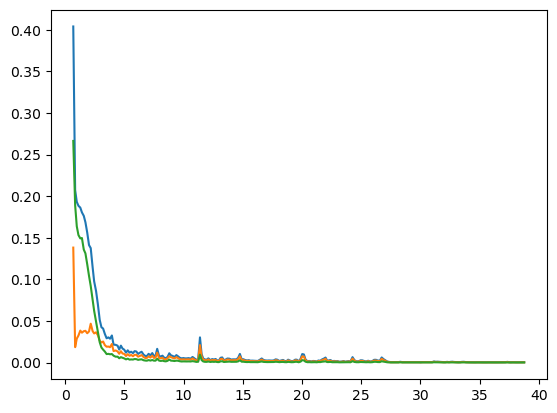

In [93]:
time= np.cumsum(h.history['time'])
plt.plot(time, h.history['loss'])
plt.plot(time, h.history['L1_loss'])
plt.plot(time, h.history['f_loss'])
plt.show()

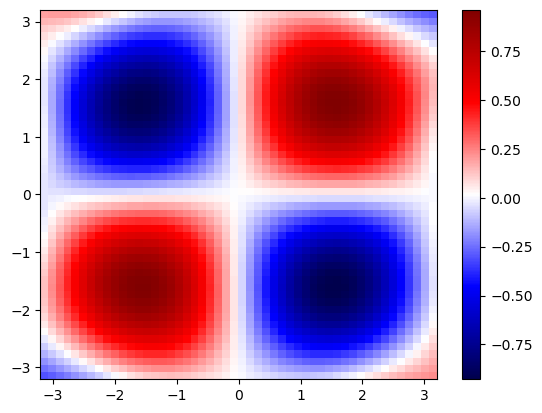

In [89]:
f_pred= f.eval([x_data, y_data])
im = plt.pcolor(x_data, y_data, f_pred, cmap ='seismic')
plt.colorbar(im)

## Data and Physics with separate grids

In [103]:
x_data, y_data = np.meshgrid(
    np.linspace(-np.pi, np.pi, 10),
    np.linspace(-np.pi, np.pi, 10)
)
f_data = np.sin(x_data)*np.sin(y_data)

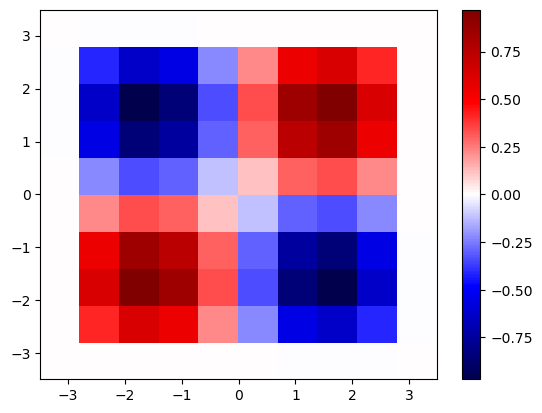

In [104]:
plt.pcolor(x_data, y_data, f_data, cmap='seismic')
plt.colorbar()

In [107]:
x_phys, y_phys = np.meshgrid(
    np.linspace(-np.pi, np.pi, 20),
    np.linspace(-np.pi, np.pi, 20)
)

In [115]:
x_train = np.concatenate([x_data.reshape(-1,1), x_phys.reshape(-1,1)])
y_train = np.concatenate([y_data.reshape(-1,1), y_phys.reshape(-1,1)])
f_data=f_data.reshape(-1,1)

In [109]:
ids_data= np.arange(0, x_data.size)
ids_phys= np.arange(ids_data.size, y_train.size)

In [112]:
sn.reset_session()
x= sn.Variable('x')
y= sn.Variable('y')
f= sn.Functional('f', [x,y], 4*[15], activation='tanh')



In [113]:
L1= sn.rename(sn.diff(f,x, order=2)+sn.diff(f,y, order=2) +2*f, 'L1')

In [114]:
m=sn.SciModel([x,y], [f,L1], loss_func='mse', optimizer='adam')

In [117]:
h= m.train([x_train, y_train], [(ids_data, f_data), (ids_phys, 'zeros')], epochs=250, learning_rate=0.005)


Total samples: 500 
Batch size: 64 
Total batches: 8 

Epoch 1/250
8/8 [==============================] - 1s 2ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.5307 - f_loss: 0.2637 - L1_loss: 0.2667 - lr: 0.0050 - time: 0.6137
Epoch 2/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.2754 - f_loss: 0.2128 - L1_loss: 0.0624 - lr: 0.0050 - time: 0.0352
Epoch 3/250
8/8 [==============================] - 0s 2ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.2296 - f_loss: 0.2045 - L1_loss: 0.0252 - lr: 0.0050 - time: 0.1208
Epoch 4/250
8/8 [==============================] - 0s 2ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.2138 - f_loss: 0.1993 - L1_loss: 0.0144 - lr: 0.0050 - time: 0.1027
Epoch 5/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.1973 - f_loss: 0.1883 - L1_loss: 0.0088 - lr: 0.0050 - time: 0.1007
Epoch 6/250
8/8 [==============================] - 0s 2ms/step - batch: 3.5000 

8/8 [==============================] - 0s 2ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.1514 - f_loss: 0.1167 - L1_loss: 0.0347 - lr: 0.0050 - time: 0.1072
Epoch 48/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.1463 - f_loss: 0.1151 - L1_loss: 0.0311 - lr: 0.0050 - time: 0.1109
Epoch 49/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.1532 - f_loss: 0.1220 - L1_loss: 0.0313 - lr: 0.0050 - time: 0.1047
Epoch 50/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.1515 - f_loss: 0.1170 - L1_loss: 0.0346 - lr: 0.0050 - time: 0.1094
Epoch 51/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.1469 - f_loss: 0.1131 - L1_loss: 0.0339 - lr: 0.0050 - time: 0.1057
Epoch 52/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.1460 - f_loss: 0.1146 - L1_loss: 0.03

8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0681 - f_loss: 0.0427 - L1_loss: 0.0253 - lr: 0.0050 - time: 0.1105
Epoch 95/250
8/8 [==============================] - 0s 3ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0607 - f_loss: 0.0366 - L1_loss: 0.0241 - lr: 0.0050 - time: 0.1172
Epoch 96/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0574 - f_loss: 0.0341 - L1_loss: 0.0234 - lr: 0.0050 - time: 0.0968
Epoch 97/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0599 - f_loss: 0.0310 - L1_loss: 0.0288 - lr: 0.0050 - time: 0.1077
Epoch 98/250
8/8 [==============================] - 0s 2ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0581 - f_loss: 0.0312 - L1_loss: 0.0268 - lr: 0.0050 - time: 0.1085
Epoch 99/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0631 - f_loss: 0.0329 - L1_loss: 0.03

Epoch 141/250
8/8 [==============================] - 0s 2ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0311 - f_loss: 0.0121 - L1_loss: 0.0190 - lr: 0.0050 - time: 0.1184
Epoch 142/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0282 - f_loss: 0.0093 - L1_loss: 0.0189 - lr: 0.0050 - time: 0.0965
Epoch 143/250
8/8 [==============================] - 0s 2ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0249 - f_loss: 0.0110 - L1_loss: 0.0139 - lr: 0.0050 - time: 0.1061
Epoch 144/250
8/8 [==============================] - 0s 2ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0267 - f_loss: 0.0098 - L1_loss: 0.0168 - lr: 0.0050 - time: 0.1166
Epoch 145/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0277 - f_loss: 0.0098 - L1_loss: 0.0179 - lr: 0.0050 - time: 0.0980
Epoch 146/250
8/8 [==============================] - 0s 2ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0338 - f_loss: 0.0

8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0125 - f_loss: 0.0045 - L1_loss: 0.0080 - lr: 0.0025 - time: 0.1076
Epoch 187/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0127 - f_loss: 0.0050 - L1_loss: 0.0077 - lr: 0.0025 - time: 0.1104
Epoch 188/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0117 - f_loss: 0.0044 - L1_loss: 0.0073 - lr: 0.0025 - time: 0.1071
Epoch 189/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0125 - f_loss: 0.0050 - L1_loss: 0.0075 - lr: 0.0025 - time: 0.1048
Epoch 190/250
8/8 [==============================] - 0s 2ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0124 - f_loss: 0.0044 - L1_loss: 0.0080 - lr: 0.0025 - time: 0.1234
Epoch 191/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0115 - f_loss: 0.0046 - L1_loss:

Epoch 233/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0083 - f_loss: 0.0032 - L1_loss: 0.0051 - lr: 0.0025 - time: 0.1079
Epoch 234/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0098 - f_loss: 0.0037 - L1_loss: 0.0061 - lr: 0.0025 - time: 0.1044
Epoch 235/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0108 - f_loss: 0.0044 - L1_loss: 0.0064 - lr: 0.0025 - time: 0.1069
Epoch 236/250
8/8 [==============================] - 0s 2ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0133 - f_loss: 0.0050 - L1_loss: 0.0082 - lr: 0.0025 - time: 0.1060
Epoch 237/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0105 - f_loss: 0.0038 - L1_loss: 0.0068 - lr: 0.0025 - time: 0.1050
Epoch 238/250
8/8 [==============================] - 0s 1ms/step - batch: 3.5000 - size: 62.5000 - loss: 0.0090 - f_loss: 0.0

In this case, we have data over the `f_data` regime and over the `ids_phys` we are minimising the `L1` to zero

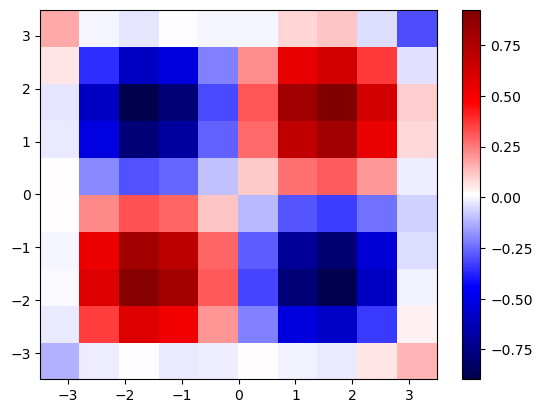

In [118]:
f_pred= f.eval([x_data, y_data])
im = plt.pcolor(x_data, y_data, f_pred, cmap ='seismic')
plt.colorbar(im)